In [1]:
! ls ../input/

incidents_datasets (3).csv


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import networkx as nx
N_SAMPLES = 40

PATH = '../input/'

data = pd.read_csv(PATH + 'incidents_datasets (3).csv', sep = '|')
data = data.sample(n = N_SAMPLES).reset_index()

### Construct a graph to represent the set of all incidents or k subsets of incidents the dataset.


In [3]:
def view_graph(G, col):
    import warnings
    warnings.filterwarnings("ignore")
    plt.figure(figsize=(8,8))
    plt.title('Connections for column {}'.format(col))
    #Printe nodes and edges
    # Create a visualisation using NetworkX and draw using matplotlib
    pos = nx.spring_layout(G, k = 10, scale = 2)
    pos = nx.random_layout(G)
    # Extract node attributes and display them as lables
    if len(nx.get_node_attributes(G, 'population')) != 0:
        labels = {key: key + ':' + str(value) for (key, value) in nx.get_node_attributes(G, 'opulation').items()}
        nx.draw(G, with_labels=True, labels=labels, font_size = 10, node_size = 10)
    else:
        nx.draw(G, with_labels=True, font_size = 10, node_size = 10)
    if len(nx.get_edge_attributes(G,'distance')) != 0:
        edge_labels = nx.get_edge_attributes(G, 'distance')
        nx.draw_networkx_edge_labels(G, labels = edge_labels, font_size = 15, node_size = 20, font_weight = 'bold')
    plt.show()

In [4]:
pair_nodes = []
g = nx.Graph()
for value in data['weekday'].unique():
    target_idx = np.array(data[data['weekday'] == value].index)
    for v1 in range(target_idx.shape[0] - 1): 
        for v2 in range(v1 + 1, target_idx.shape[0]):
            g.add_edge(target_idx[v1], target_idx[v2], attr_dict={'weekday': value})

In [5]:
from sklearn.datasets import make_blobs
COL = 'weekday'
centers = {
    'Mon': 1,
    'Tue': 2,
    'Thu': 3,
    'Wed': 4,
    'Fri': 5,
    'Sat': 6,
    'Sun': 7
}
X, Y = make_blobs(n_samples = data[COL].value_counts().values, centers = [[1,1], [3,3], [5,5], [3,6], [7,8], [8,10], [11,13]])
for idx, node in enumerate(g.nodes(data = True)):
    for col in data.columns:
        node[1][col] = data.loc[idx, col]
    node[1]['X'] = X[idx]
    node[1]['Y'] = Y[idx]

In [6]:
# Define node positions data structure (dict) for plotting
node_positions = {node[0]: (node[1]['X'], node[1]['Y']) for node in g.nodes(data=True)}

# Preview of node_positions with a bit of hack (there is no head/slice method for dictionaries).
dict(list(node_positions.items())[0:5])

{0: (array([0.79549576, 1.12396963]), 0),
 2: (array([0.1165215 , 1.34317505]), 0),
 4: (array([5.75620791, 7.90920974]), 4),
 9: (array([7.29359591, 4.00962683]), 2),
 1: (array([2.19046423, 3.27315763]), 1)}

In [7]:
pair_nodes = []
g = nx.Graph()
for value in data['weekday'].unique():
    target_idx = np.array(data[data['weekday'] == value].index)
    for v1 in range(target_idx.shape[0] - 1): 
        for v2 in range(v1 + 1, target_idx.shape[0]):
            g.add_edge(target_idx[v1], target_idx[v2], attr_dict={'weekday': value})

In [8]:
for idx, node in enumerate(g.nodes(data = True)):
    for col in data.columns:
        node[1][col] = data.loc[idx, col]

In [9]:
# pd.DataFrame([data.columns, pd.Series(data.columns).apply(lambda x : len(data.loc[:, x].unique()))]).T

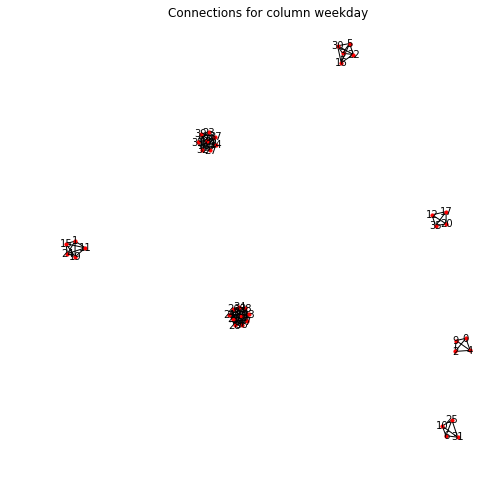

In [10]:
# malware_family = nx.Graph(nodes)
view_graph(g, col = COL)

In [11]:
# data = pd.read_csv(PATH + 'incidents_datasets (3).csv', sep = '|')
# data = data.sample(n = N_SAMPLES).reset_index()
# G = nx.DiGraph()

# properties = ['categoryname', 'ipcategory_name', 'ipcategory_scope', 'overallseverity', 'weekday']
# attrs = dict()
# for i in range(data.shape[0]):
#     for j in range(data.shape[0]):
#         if i != j:
#             if np.sum(data[properties].iloc[i] == data[properties].iloc[j]) == len(properties):
#                 node1 = 'Obs_' + str(i)
#                 node2 = 'Obs_' + str(j)
#                 if not G.has_node(node1):
#                     G.add_node(node1)
#                 if not G.has_node(node2):
#                     G.add_node(node2)
#                 for prop in properties:
#                     if data[prop].iloc[i] == data[prop].iloc[j]:
#                         propnode = prop + ': '+ str(data[prop].iloc[i])
#                         if not G.has_node(propnode):
#                             G.add_node(propnode)
#                     G.add_edge(node1,propnode)
#                     G.add_edge(node2, propnode)

### Apply shared attribute analysis to detect similar sub-graph structures

In [36]:
# Naive Community Detection
SIMILARITY = 3
g = nx.Graph()
for i in range(data.shape[0]-1):
    for j in range(1, data.shape[0]):
        vec = data.iloc[i, :], data.iloc[j, :]
        if np.sum(vec) > SIMILARITY:
            g.add_edge(data.loc[i, 'index'], data.loc[j, 'index'])

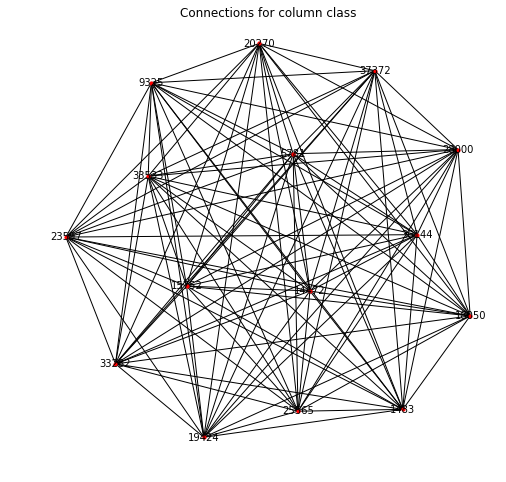

In [37]:
# malware_family = nx.Graph(nodes)
view_graph(g, col = 'class')

### Communities detection using KMeans Algorithm

In [26]:
N_SAMPLES = 100

data = pd.read_csv(PATH + 'incidents_datasets (3).csv', sep = '|')
data = data.sample(n = N_SAMPLES).reset_index()

In [27]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Label Encoding
for f in data.columns:
    if data[f].dtype=='object': 
        lbl = LabelEncoder()
        data[f] = lbl.fit_transform(list(data[f].values))

        
kmeans = KMeans(n_clusters = 4)
kmeans.fit(data.fillna(-999))

res = PCA(2).fit_transform(data.fillna(-999))
x,y = res[:, 0], res[:, 1]

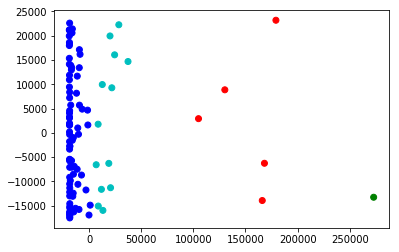

In [28]:
plt.scatter(x,y, c = pd.Series(kmeans.labels_).map({0: 'b', 1: 'r', 2: 'g', 3: 'c', 4: 'k'}))

In [29]:
data['class'] = kmeans.labels_
pair_nodes = []
g = nx.Graph()
for value in data['class'].unique():
    target_idx = np.array(data[data['class'] == value].index)
    for v1 in range(target_idx.shape[0] - 1): 
        for v2 in range(v1 + 1, target_idx.shape[0]):
            g.add_edge(target_idx[v1], target_idx[v2], attr_dict={'class': value})

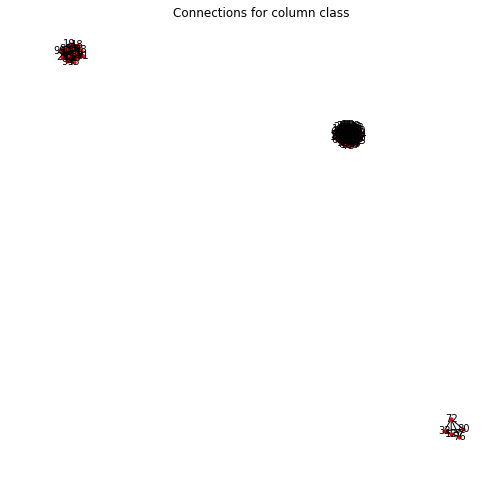

In [30]:
# malware_family = nx.Graph(nodes)
view_graph(g, col = 'class')